# Rating Prediction Project (Flip Robo Technologies)

In [1]:
# Let's import the necessary libraries


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Now let's import the dataset

data = pd.read_csv("Ratings Data.csv")
data.head()

Product Name  Ratings         Reviews
0       Mobile        5         Awesome
1       Mobile        5         Awesome
2       Mobile        5       Brilliant
3       Mobile        4  Classy product
4       Mobile        5    disoppointed

In [3]:
# Shape of the dataset

data.shape

(543, 3)

In [4]:
# Info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product Name  543 non-null    object
 1   Ratings       543 non-null    int64 
 2   Reviews       543 non-null    object
dtypes: int64(1), object(2)
memory usage: 12.9+ KB


In [5]:
# null values

data.isnull().sum()

Product Name    0
Ratings         0
Reviews         0
dtype: int64

In [6]:
# Value counts

data["Ratings"].value_counts()

# There are only 4 type of ratings

5    386
4    122
3     28
1      5
2      2
Name: Ratings, dtype: int64

In [7]:
# Value count of types of ratings

for col in data.columns:
    if data[col].dtype=='object':
        print(data[col].value_counts())
    print()

Headphones    116
Printers      112
Camera         82
Monitors       63
Laptop         63
Mobile         62
Watches        45
Name: Product Name, dtype: int64


Brilliant                  30
Excellent                  29
Wonderful                  28
Great product              26
Mind-blowing purchase      26
                           ..
Worthless                   1
Terrible product            1
Could be way better         1
BEST FROM HP                1
Personal Xerox Machine.     1
Name: Reviews, Length: 76, dtype: int64



<AxesSubplot:xlabel='Product Name', ylabel='count'>

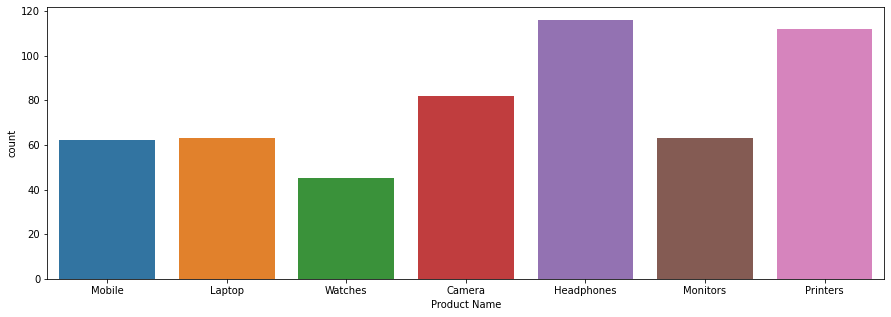

In [8]:
# Count of Rating review products

plt.figure(figsize=(15,5))
sns.countplot(x="Product Name",data=data)

In [9]:
# Top 5 comments

top_5_comments = data.sort_values("Ratings",ascending=False)
top_5_comments.head(5)

Product Name  Ratings         Reviews
0         Mobile        5         Awesome
269   Headphones        5  Classy product
279   Headphones        5       Excellent
278   Headphones        5       Excellent
277   Headphones        5       Excellent

In [10]:
bottom_5_comments = data.sort_values("Ratings",ascending=True)
bottom_5_comments.head(5)

Product Name  Ratings                 Reviews
478     Printers        1               Hated it!
536     Printers        1  Worst experience ever!
534     Printers        1         Waste of money!
533     Printers        1         Waste of money!
524     Printers        1         Useless product

In [11]:
categorical_column = data.drop(columns = ["Ratings"], axis=1)
categorical_column

Product Name            Reviews
0         Mobile            Awesome
1         Mobile            Awesome
2         Mobile          Brilliant
3         Mobile     Classy product
4         Mobile       disoppointed
..           ...                ...
538     Printers  Worth every penny
539     Printers  Worth every penny
540     Printers  Worth every penny
541     Printers  Worth every penny
542     Printers    Worth the money

[543 rows x 2 columns]

In [12]:
# Let's convert the categorical columne to numerical form

dataset = pd.get_dummies(data, drop_first=True)
dataset.shape

(543, 82)

In [13]:
# Let's separate the input and target variables

X = dataset.drop(columns = ["Ratings"], axis=1)
y = dataset["Ratings"]

In [14]:
# Let's import the necessary libraries for model buildings

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from time import time

In [15]:
'''



# Let's do the scaling first

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(X)


'''

"\n\n\n\n# Let's do the scaling first\n\nfrom sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\nscaled = scaler.fit_transform(X)\n\n\n"

In [16]:
# Let's define a model structure

def model_selection(model):
    best_score = 0
    best_state = 0
    start = time()
    for i in range(1,101):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = i)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = r2_score(y_test, y_pred)
        if score > best_score:
            best_score = score
            best_state = i
    print("Best R2 Score is          :",best_score)
    print("Best Random State is      :",best_state)
#    print("Cross Validation Score is :",cross_val_score(model, X, y, cv=5, scoring="r2").mean())
    print("")
    end = time()
    print("Time taken by model for prediction is : {:.4} seconds".format(end-start))

In [17]:
'''

# Linear Regression

from sklearn.linear_model import LinearRegression

LR = LinearRegression()
model_selection(LR)

'''

'\n\n# Linear Regression\n\nfrom sklearn.linear_model import LinearRegression\n\nLR = LinearRegression()\nmodel_selection(LR)\n\n'

In [18]:
# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
model_selection(RFR)

Best R2 Score is          : 0.4241853887914675
Best Random State is      : 73

Time taken by model for prediction is : 48.73 seconds


In [20]:
import joblib

joblib.dump(RFR,"Final Rating Model.pkl")

['Final Rating Model.pkl']